In [8]:
# Importing modules and libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import networkx as nx
import matplotlib.colors as mcolors
from pyvis.network import Network
import webbrowser
import plotly.graph_objects as go
import numpy as np
from scipy.cluster.hierarchy import linkage, leaves_list
from IPython.display import HTML, display, IFrame

In [10]:
# Load citation data from CSV
# Columns: 
# [0] citing_id – the ID of the citing paper
# [1] cited_id  – the ID of the cited paper
path = '/lustre/b192aa/b192aa36/input/citations.csv'

citations_df = pd.read_csv(path, header=None) 

print(citations_df.head())

                                          0  \
0                                 citing_id   
1  79b1c84af0aea452e8bbfbff8f5ef35edd1e0ceb   
2  79b1c84af0aea452e8bbfbff8f5ef35edd1e0ceb   
3  43981a8e26a5a82f6f852f9fb1734e716663a65b   
4  43981a8e26a5a82f6f852f9fb1734e716663a65b   

                                          1  
0                                  cited_id  
1  593f3310f774aa826c656b65c8cbc12a96961904  
2  25b3e47fb7413c7b4aa3de6a94f126a472559112  
3  9a8fbfe897e0b60e2cc939cbba069345f6253cc7  
4  62b048f93b98e2a42cd18a3d4155e33c1739bc51  


In [13]:
citations_df.columns = ['citing_id', 'cited_id']

In [14]:
citations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531541086 entries, 0 to 531541085
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   citing_id  object
 1   cited_id   object
dtypes: object(2)
memory usage: 7.9+ GB


In [15]:
# Load mapping of paper IDs to their respective fields of study
# Columns: 
# [0] paper_id – the ID of the paper
# [1] fields_of_study  – field(s) of study associated with the paper
path1 = '/lustre/b192aa/b192aa36/input/processed.csv'
processed_df = pd.read_csv(path1, header=None) 
print(processed_df.head())

                                          0                1
0                                  paper_id  fields_of_study
1  ff474e5b17fd58059606b6e82caf26e2434d4c1b       {Medicine}
2  efda7ba3b49d6c4b502c5e8e87aea2711898d0a6       {Medicine}
3  91abcea47951139b20c51c379173d88ee602d922       {Medicine}
4  49c4bba0453d9a3b7433989777e55217b55a046b       {Medicine}


In [16]:
# Columns aren't named properly. Rename them and drop the first row
processed_df.columns = ['paper_id', 'fields_of_study']
processed_df = processed_df.iloc[1:].reset_index(drop=True)

In [7]:
print("Citation information: ")
print("Number of papers that cite anything:", citations_df['citing_id'].nunique())
print("Total number of citation relationships (edges):", len(citations_df))
citations_per_paper = citations_df.groupby('citing_id').size() # group by the same paper id and calculate the size of each group
print("Average citations made per paper:", round(citations_per_paper.mean(), 2))

Citation information: 
Number of papers that cite anything: 16597958
Total number of citation relationships (edges): 531541086
Average citations made per paper: 32.02


In [8]:
# Build markdown table header
top_10_citing = citations_per_paper.sort_values(ascending=False).head(10)
table_top = "| Rank | Paper ID | Citations Made |\n"
table_top += "|-------|-----------|-------------------|\n"

# Loop through and format each row
for i, (paper_id, count) in enumerate(top_10_citing.items(), start=1):
    link = f"https://www.semanticscholar.org/paper/{paper_id}"
    table_top += f"| {i} | [{paper_id}]({link}) | {count} |\n"

# Display
Markdown(table_top)

| Rank | Paper ID | Citations Made |
|-------|-----------|-------------------|
| 1 | [5603275a7e76d24f83528982dda9dc6071838e58](https://www.semanticscholar.org/paper/5603275a7e76d24f83528982dda9dc6071838e58) | 10038 |
| 2 | [5fafc9012cd3406a5975bcb5be8836b9819ea09a](https://www.semanticscholar.org/paper/5fafc9012cd3406a5975bcb5be8836b9819ea09a) | 9838 |
| 3 | [8c7a004a5bb88a87dd45e925313a1045bb0fc76d](https://www.semanticscholar.org/paper/8c7a004a5bb88a87dd45e925313a1045bb0fc76d) | 8610 |
| 4 | [92e68ef02fee20be7020d6abeabb158404da45ca](https://www.semanticscholar.org/paper/92e68ef02fee20be7020d6abeabb158404da45ca) | 8406 |
| 5 | [2a216dbb8d99d510a6fe1959d948ec3d2d1dcdc6](https://www.semanticscholar.org/paper/2a216dbb8d99d510a6fe1959d948ec3d2d1dcdc6) | 7400 |
| 6 | [52471254d29418efefa2650bc40cca4a27e6be7a](https://www.semanticscholar.org/paper/52471254d29418efefa2650bc40cca4a27e6be7a) | 6608 |
| 7 | [cb81af946e9277a24a624eae451b0003e261d677](https://www.semanticscholar.org/paper/cb81af946e9277a24a624eae451b0003e261d677) | 4723 |
| 8 | [2120dfb9599281a2d4ca074a687a6be05d8a08ce](https://www.semanticscholar.org/paper/2120dfb9599281a2d4ca074a687a6be05d8a08ce) | 4588 |
| 9 | [a7f20c59f9020639b9357e8054bb5d0080d3aecb](https://www.semanticscholar.org/paper/a7f20c59f9020639b9357e8054bb5d0080d3aecb) | 4501 |
| 10 | [86dd1f6f1d0eda046dff4b59d815b5069a19ba82](https://www.semanticscholar.org/paper/86dd1f6f1d0eda046dff4b59d815b5069a19ba82) | 3927 |


In [9]:
# Build markdown table header
bottom_10_citing = citations_per_paper.sort_values(ascending=True).head(10)
table_bottom = "| Rank | Paper ID | Citations Made |\n"
table_bottom += "|-------|-----------|-------------|\n"

# Loop through and format each row
for i, (paper_id, count) in enumerate(bottom_10_citing.items(), start=1):
    link = f"https://www.semanticscholar.org/paper/{paper_id}"
    table_bottom += f"| {i} | [{paper_id}]({link}) | {count} |\n"

# Display 
Markdown(table_bottom)

| Rank | Paper ID | Citations Made |
|-------|-----------|-------------|
| 1 | [579184ee47ac96c50ac0b90c902f6e519cce5faf](https://www.semanticscholar.org/paper/579184ee47ac96c50ac0b90c902f6e519cce5faf) | 1 |
| 2 | [8210ec83b28dc3e10773b4c5c43f8204c77494a5](https://www.semanticscholar.org/paper/8210ec83b28dc3e10773b4c5c43f8204c77494a5) | 1 |
| 3 | [10e6b019ea3b97321aa6cfa0298a3ff251b0b285](https://www.semanticscholar.org/paper/10e6b019ea3b97321aa6cfa0298a3ff251b0b285) | 1 |
| 4 | [b937edf546ed9f77b2476df3077f9df41b8b6dcb](https://www.semanticscholar.org/paper/b937edf546ed9f77b2476df3077f9df41b8b6dcb) | 1 |
| 5 | [afd095f8310291e2e338a587bba41cf074e52fb9](https://www.semanticscholar.org/paper/afd095f8310291e2e338a587bba41cf074e52fb9) | 1 |
| 6 | [9b728c2d4b8def8f224af830707d7f48037c257a](https://www.semanticscholar.org/paper/9b728c2d4b8def8f224af830707d7f48037c257a) | 1 |
| 7 | [ffff0d12f850a813e258cd5855a3b89e0da13150](https://www.semanticscholar.org/paper/ffff0d12f850a813e258cd5855a3b89e0da13150) | 1 |
| 8 | [695badd865b4cb193706fdcd520d3415c1b819c6](https://www.semanticscholar.org/paper/695badd865b4cb193706fdcd520d3415c1b819c6) | 1 |
| 9 | [2b16f464dd0b0ff0ce186dd7de2805e5bfd9e25a](https://www.semanticscholar.org/paper/2b16f464dd0b0ff0ce186dd7de2805e5bfd9e25a) | 1 |
| 10 | [a8189ab6e4ac31d9d7cdfb9f873a4859400cea40](https://www.semanticscholar.org/paper/a8189ab6e4ac31d9d7cdfb9f873a4859400cea40) | 1 |


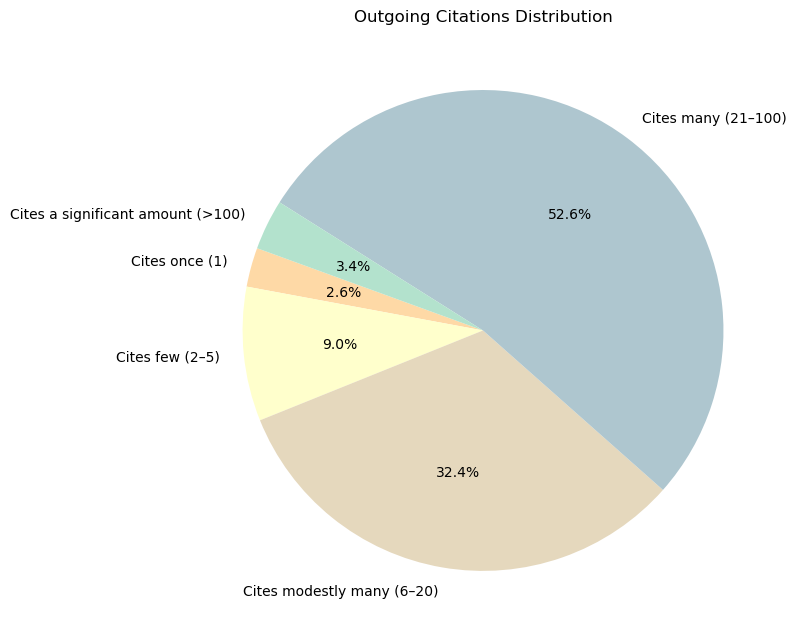

In [17]:
# Pie chart on how many references there are per paper
reference_counts = citations_df['citing_id'].value_counts()

# Define bins and labels
bins = [0, 1, 5, 20, 100, float('inf')]
labels_citing = [
    "Cites once (1)",
    "Cites few (2–5)",
    "Cites modestly many (6–20)",
    "Cites many (21–100)",
    "Cites a significant amount (>100)"
]
# Categorize
categories = pd.cut(reference_counts, bins=bins, labels=labels_citing, right=True)

# Count how many papers fall into each category
category_counts_ref = categories.value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = ['#fed9a6', '#ffffcc', '#e5d8bd', '#aec6cf', '#b3e2cd']
category_counts_ref.plot.pie(
    autopct='%1.1f%%',
    startangle=160,
    colors=colors
)
plt.title("Outgoing Citations Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

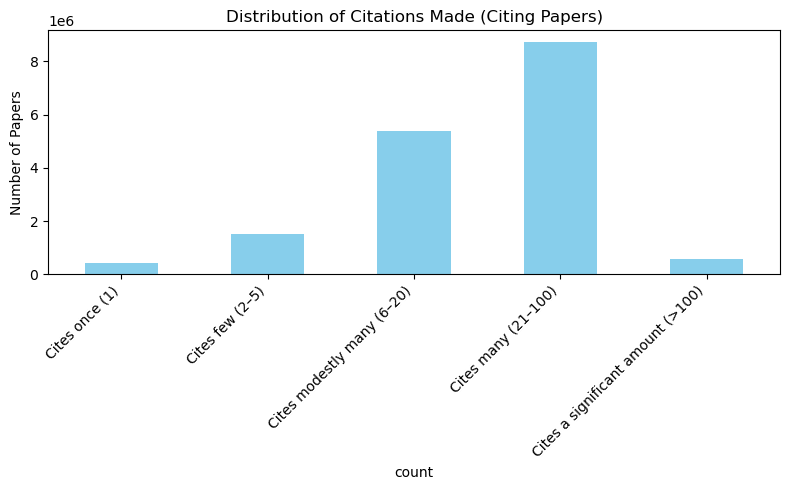

In [18]:
# We already have all the data in variables

# Plot
plt.figure(figsize=(8, 5))
category_counts_ref.plot(kind='bar', color='skyblue')
plt.title("Distribution of Citations Made (Citing Papers)")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
citations_received = citations_df.groupby('cited_id').size()
print("How many times each paper is cited on average:", round(citations_received.mean(), 2))
print()

How many times each paper is cited on average: 10.44



In [13]:
# also names here please

# Get top 10 most cited papers
top_10_cited = citations_received.sort_values(ascending=False).head(10)

# Markdown table for most cited
table_top_cit = "| Rank | Paper ID | Times Cited |\n"
table_top_cit += "|------|----------|--------------|\n"

for i, (paper_id, count) in enumerate(top_10_cited.items(), start=1):
    link = f"https://www.semanticscholar.org/paper/{paper_id}"
    table_top_cit += f"| {i} | [{paper_id}]({link}) | {count} |\n"

Markdown(table_top_cit)

| Rank | Paper ID | Times Cited |
|------|----------|--------------|
| 1 | [8ceb75144ecb846bf463e7565e6a18998ae29d1a](https://www.semanticscholar.org/paper/8ceb75144ecb846bf463e7565e6a18998ae29d1a) | 111746 |
| 2 | [77ff0bb96b1d085fe284c0a5d87d1d109001afcd](https://www.semanticscholar.org/paper/77ff0bb96b1d085fe284c0a5d87d1d109001afcd) | 81977 |
| 3 | [659408b243cec55de8d0a3bc51b81173007aa89b](https://www.semanticscholar.org/paper/659408b243cec55de8d0a3bc51b81173007aa89b) | 77545 |
| 4 | [78510d00faa87970833c79170fc3024817e54c27](https://www.semanticscholar.org/paper/78510d00faa87970833c79170fc3024817e54c27) | 72170 |
| 5 | [2c03df8b48bf3fa39054345bafabfeff15bfd11d](https://www.semanticscholar.org/paper/2c03df8b48bf3fa39054345bafabfeff15bfd11d) | 58230 |
| 6 | [a6cb366736791bcccc5c8639de5a8f9636bf87e8](https://www.semanticscholar.org/paper/a6cb366736791bcccc5c8639de5a8f9636bf87e8) | 57726 |
| 7 | [3d2218b17e7898a222e5fc2079a3f1531990708f](https://www.semanticscholar.org/paper/3d2218b17e7898a222e5fc2079a3f1531990708f) | 55147 |
| 8 | [89f4a8ed61c1af384c895984ece7f07148747fdf](https://www.semanticscholar.org/paper/89f4a8ed61c1af384c895984ece7f07148747fdf) | 46768 |
| 9 | [34b9635d7779e219e9d60e0d3d33919ca9bc123c](https://www.semanticscholar.org/paper/34b9635d7779e219e9d60e0d3d33919ca9bc123c) | 43168 |
| 10 | [e7c8aa2cb2223f17615c1b1ae3b33095466e95cc](https://www.semanticscholar.org/paper/e7c8aa2cb2223f17615c1b1ae3b33095466e95cc) | 41491 |


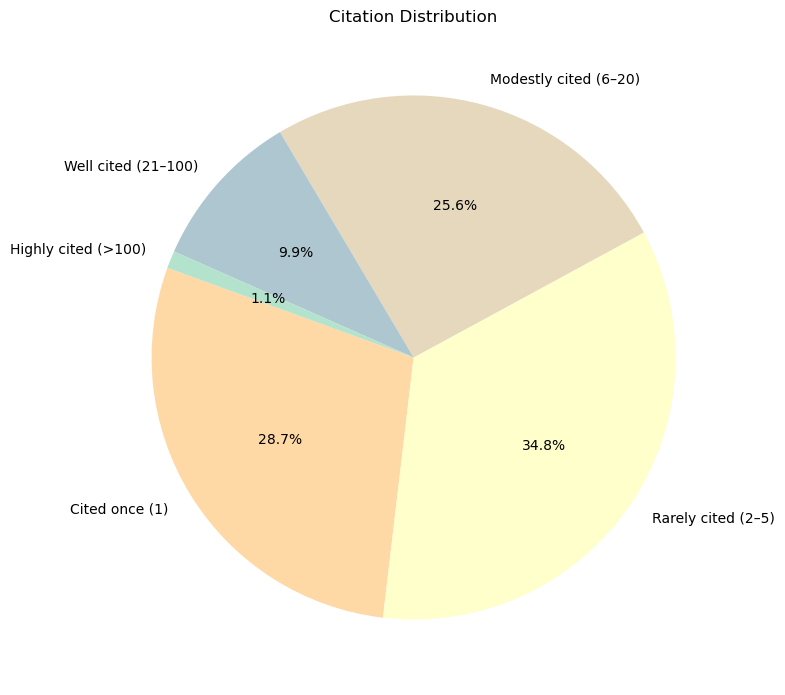

In [19]:
# Pie chart on how many times papers are cited

citation_counts = citations_df['cited_id'].value_counts()

# Define bins and labels
labels_cited = [
    "Cited once (1)",
    "Rarely cited (2–5)",
    "Modestly cited (6–20)",
    "Well cited (21–100)",
    "Highly cited (>100)"
]

# Categorize
categories = pd.cut(citation_counts, bins=bins, labels=labels_cited, right=True)

# Count how many papers fall into each category
category_counts_cit = categories.value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = ['#fed9a6', '#ffffcc', '#e5d8bd', '#aec6cf', '#b3e2cd']
category_counts_cit.plot.pie(autopct='%1.1f%%', startangle=160, colors=colors) # fix overlapping
plt.title("Citation Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

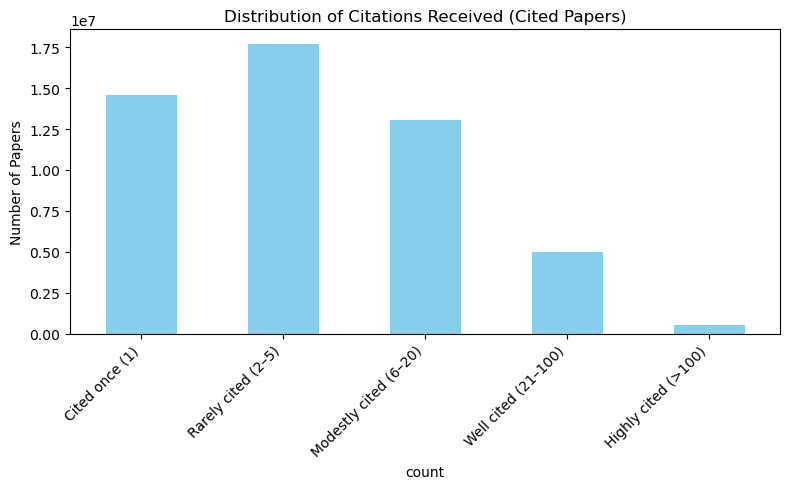

In [15]:
# We already have all the data in variables

# Plot
plt.figure(figsize=(8, 5))
category_counts_cit.plot(kind='bar', color='skyblue')
plt.title("Distribution of Citations Received (Cited Papers)")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

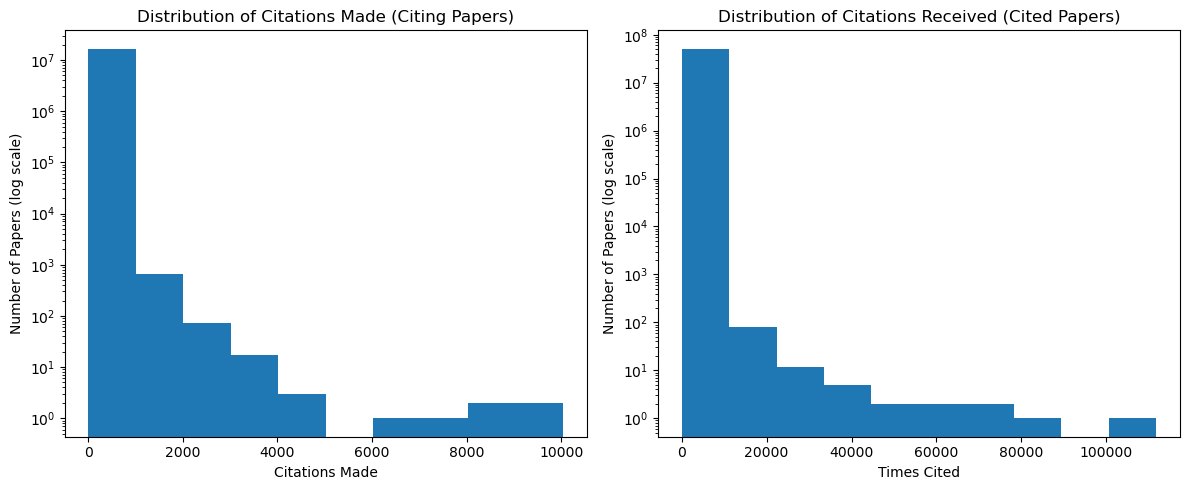

In [16]:
# We already have all the data in variables, so just plot

plt.figure(figsize=(12, 5))

# Plot 1: Citations made (citing_id)
plt.subplot(1, 2, 1)
plt.hist(citations_per_paper, bins=10, log=True)
plt.title("Distribution of Citations Made (Citing Papers)")
plt.xlabel("Citations Made")
plt.ylabel("Number of Papers (log scale)")

# Plot 2: Citations received (cited_id)
plt.subplot(1, 2, 2)
plt.hist(citations_received, bins=10, log=True)
plt.title("Distribution of Citations Received (Cited Papers)")
plt.xlabel("Times Cited")
plt.ylabel("Number of Papers (log scale)")

plt.tight_layout()
plt.show()


In [17]:
# Turn the strings into Python lists
processed_df['fields_list'] = (
    processed_df['fields_of_study']
    .str.strip('{}')
    .str.split(',')
    .apply(lambda L: [x.strip().strip('"').strip("'") for x in L if x])
)
# Pick the first element Unknown as a primary field
processed_df['primary_field'] = processed_df['fields_list'].apply(lambda L: L[0] if L else 'Unknown')

In [18]:
# Find the top 1500 most-cited papers (in-degree) in O(N log k)
citation_counts = citations_df['cited_id'].value_counts()
top_ids = set(citation_counts.nlargest(1500).index)
print(f"Picked {len(top_ids)} top-cited IDs")

# Filter the edge list down to only citations among those top papers
sub_edges = citations_df[
    citations_df['citing_id'].isin(top_ids) &
    citations_df['cited_id'].isin(top_ids)
].copy()

# Find which of those top_ids actually appear in at least one edge
connected_ids = set(sub_edges['citing_id']).union(sub_edges['cited_id'])
print(f"{len(connected_ids)} of those are actually connected")

# Build the small graph on just those connected edges
G_small = nx.from_pandas_edgelist(
    sub_edges,
    source='citing_id',
    target='cited_id',
    create_using=nx.DiGraph()
)

# Prepare a color mapping for the connected nodes
field_map = processed_df.set_index('paper_id')['primary_field'].to_dict()
fields    = sorted({ field_map.get(n, 'Unknown') for n in connected_ids })
cmap      = plt.get_cmap('tab20')
field2color = {
    fld: "#{:02x}{:02x}{:02x}".format(
        *(int(255*c) for c in cmap(i/len(fields))[:3])
    )
    for i, fld in enumerate(fields)
}

# Build the PyVis network on G_small
net = Network(height='800px', width='100%', directed=True)

# Add nodes
for n in G_small.nodes():
    fld = field_map.get(n, 'Unknown')
    raw = 1 + 0.1 * citation_counts.get(n, 0)
    size = min(raw, 50)   # never bigger than 50px
    net.add_node(n, label=n, title=f"ID: {n}<br>Field: {fld}", color=field2color[fld], size=size)

# Add edges
for u, v in G_small.edges():
    net.add_edge(u, v)

# Export and display
net.write_html("top1500_connected.html")
display(IFrame(src="top1500_connected.html", width="100%", height="800px"))


Picked 1500 top-cited IDs
974 of those are actually connected


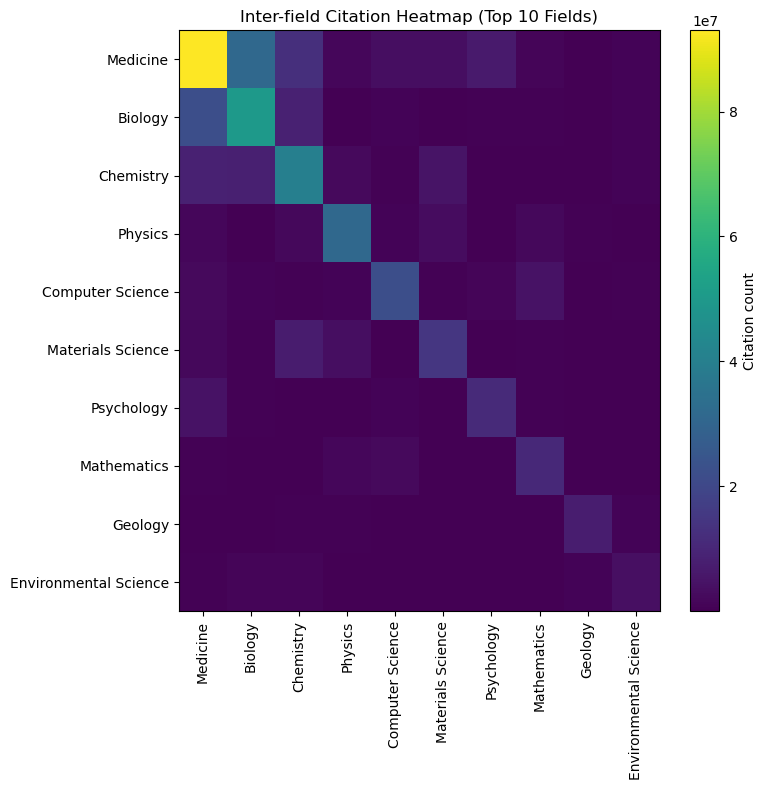

In [19]:
# Paramenters
TOP_N_FIELDS = 10  # adjust as needed for performance

# Build a fast map from paper ID → primary field
field_map = processed_df.set_index('paper_id')['primary_field'].to_dict()

# Annotate the citations with their fields via map
citations_df['citing_field'] = citations_df['citing_id'].map(field_map)
citations_df['cited_field']  = citations_df['cited_id'].map(field_map)

# Drop any rows missing either field
df = citations_df.dropna(subset=['citing_field','cited_field'])

# Identify the TOP_N_FIELDS most active fields (as citer + cited)
citer_counts = df['citing_field'].value_counts()
cited_counts = df['cited_field'].value_counts()
total_counts = citer_counts.add(cited_counts, fill_value=0)
top_fields = total_counts.nlargest(TOP_N_FIELDS).index.tolist()

# Filter down to citations among those top fields
df_small = df[
    df['citing_field'].isin(top_fields) &
    df['cited_field'].isin(top_fields)
]

# Build a TOP_N_FIELDS × TOP_N_FIELDS citation matrix
mat = pd.crosstab(df_small['citing_field'], df_small['cited_field'])
mat = mat.reindex(index=top_fields, columns=top_fields, fill_value=0)

# Clustered Heatmap

# Perform hierarchical clustering to order rows and columns
row_link = linkage(mat.values, method='average', metric='euclidean')
col_link = linkage(mat.values.T, method='average', metric='euclidean')
row_order = leaves_list(row_link)
col_order = leaves_list(col_link)

ordered = mat.iloc[row_order, col_order]
labels  = ordered.index.tolist()

# Plot the clustered heatmap
plt.figure(figsize=(8, 8))
plt.imshow(ordered.values, aspect='auto')
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels)
plt.title(f"Inter-field Citation Heatmap (Top {TOP_N_FIELDS} Fields)")
plt.colorbar(label="Citation count")
plt.tight_layout()
plt.show()
